# IIC2433 - 2022-1

# Tarea 1 - It's free real estate

# Introducción

Vicencio Sabadez, mente de tiburón como siempre, decidió invertir en el mercado inmobiliario de EE.UU. Como Vicencio es un *vío*, decidió utilizar sus conocimientos de minería de datos para ayudarse a conocer el mercado en el que quiere ingresar.
Pidiéndole ayuda a su amigo, Carlos Kaggle, consiguió un dataset con los detalles de diferentes casas, y sus precios respectivos. Con esto, quiere hacer una herramienta de predicción del precio de una casa ingresando otros valores pertinentes. Ahí es donde entras tú. Tendrás que trabajar los datos obtenidos por Vicencio, implementar **dos modelos de regresión, y analizarlos**.
Se espera que las decisiones que tomes sean informadas y explicadas en el notebook para que Vicencio entienda lo que estás haciendo.

# Formato de Entrega
Deberás entregar SOLO el archivo .ipynb en el buzón respectivo en canvas. 

**IMPORTANTE**: 
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje perfecto.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

# LIBRERÍAS
Librerías aceptadas:
- Numpy
- Pandas


Librerías prohibidas:
- sklearn
- *Cualquier otra librería que maneje y prediga datos* 

## Parte 1: Manejo de datos (1.5 ptos.)


In [ ]:
import pandas as pd
import numpy as np

### 1.a Descripción de los datos (0.5 ptos.)

En esta sección, carga `real_estate.csv` y describe sus columnas. Estúdia el dataset. Recuerda tener claro que el objetivo de esto es predecir el precio de las casas.

In [ ]:
dataset = pd.read_csv("real_estate.csv")
dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


Haz un gráfico donde se vea la distribución de los precios de las casas. Además de esto, haz una representación gráfica de almenos 2 de las otras columnas.
(Estas últimas pueden ser gráficos de barra, histogramas, etc.).


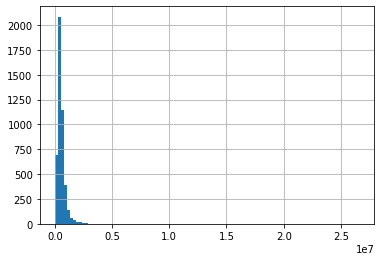

In [ ]:
dataset['price'].hist(bins = 100)

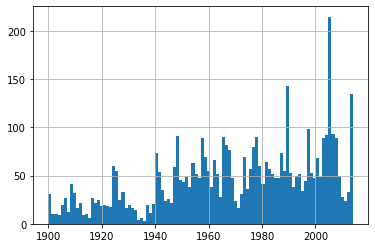

In [ ]:
dataset['yr_built'].hist(bins = 100)

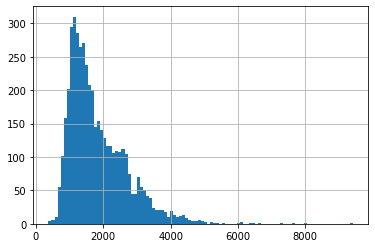

In [ ]:
dataset['sqft_above'].hist(bins = 100)

Describimos cada columna:

In [ ]:
dataset.keys()
for key in dataset.keys():
  print("\n")
  print("COLUMNA:",key)
  print("")
  print(dataset[key].describe())
  print("")



COLUMNA: date

count                    4600
unique                     70
top       2014-06-23 00:00:00
freq                      142
Name: date, dtype: object



COLUMNA: price

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64



COLUMNA: bedrooms

count    4600.000000
mean        3.400870
std         0.908848
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: bedrooms, dtype: float64



COLUMNA: bathrooms

count    4600.000000
mean        2.160815
std         0.783781
min         0.000000
25%         1.750000
50%         2.250000
75%         2.500000
max         8.000000
Name: bathrooms, dtype: float64



COLUMNA: sqft_living

count     4600.000000
mean      2139.346957
std        963.206916
min        370.000000
25%       1460.000000
50%       1980.000000
75%       262

### 1.b Manejo de información sobrante y outliers (0.3 ptos.)

En esta sección elimina las columnas que crees no necesarias para los modelos que harás. Debes explicar la razón de eliminación de cada columna.
HINT: Para una primera limpieza, ten en mente el tipo de las columnas presentes (categóricas o numéricas).

#Primero
lo que haremos sera, mostrar la cantidad de diferentes valores que tiene cada columna, para luego mostrar las que nos pareces mascaracteristicas:

In [ ]:
dataset.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [ ]:
dataset["country"].value_counts()

USA    4600
Name: country, dtype: int64

In [ ]:
dataset["statezip"].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [ ]:
dataset["street"].value_counts()

2520 Mulberry Walk NE     4
2500 Mulberry Walk NE     3
9413 34th Ave SW          2
6008 8th Ave NE           2
11034 NE 26th Pl          2
                         ..
1404 Broadmoor Dr E       1
3249 E Ames Lake Dr NE    1
6032 35th Ave NE          1
1006 NE Ravenna Blvd      1
18717 SE 258th St         1
Name: street, Length: 4525, dtype: int64

In [ ]:
dataset["sqft_basement"].value_counts()

0       2745
500       53
600       45
800       43
900       41
        ... 
2300       1
265        1
1610       1
862        1
1640       1
Name: sqft_basement, Length: 207, dtype: int64

Con estos valores mostrados, decidimos eliminar las siguientes columnas:
- City: Notamos que todas las ciudades tambien son de Washington, que a diferencia del codigo zip, podriamos obtener la informacion discretizada, si obtuvieramos el digito especifico quitando los caracter "WA".
- Country: Todos los datos del dataset, tienen el mismo valor en la columna, por lo que no sera de utilidad.
- Date: Lo borraremos, ya que no sirve para el caso que estamos analizando.
- Street: Si notamos este valor, tambien diferencia por el numero que compone a la variable categorica.  Donde esto genera que se 2% se repita.
- Sqft_basement: en este caso, notamos que la mitad de los datos son nulos, junto con esto, la logica de intentar encontrar una relacion entre el precio de una casa y el tamano de su sotano.

In [ ]:
del dataset['city']
del dataset['country']
del dataset['date']
del dataset['street']
del dataset['sqft_basement']


Ahora aplicamos el filtro por el cual sacamos "city", para encontrar el statezip

In [ ]:
def ziper(wenlo):
  return int(wenlo[3:])
dataset['statezip'] = dataset['statezip'].apply(ziper)
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,yr_built,yr_renovated,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,1955,2005,98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,1921,0,98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,1966,0,98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,1976,1992,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,1954,1979,98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,1983,2009,98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,2009,0,98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1974,0,98178


En la parte 1.a observaste la distribución de los precios de las casas. ¿Se ven outliers? Si es así, trabájalos a tu juicio. Es importante que expliques tu proceso de pensamiento al tomar tus decisiones.

Si se ven,esto puede quedar demostrado con un boxplot

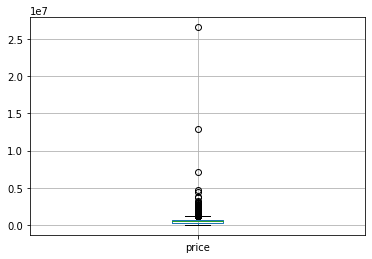

In [ ]:
dataset.boxplot(column=['price'])

Con esto notamos que hay 3 outliers, que son datos que se escapan del promecio, por lo que eliminaremos estos con una restriccion

In [ ]:
dataset = dataset[dataset['price'] <= 5_000_000]
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,yr_built,yr_renovated,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,1955,2005,98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,1921,0,98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,1966,0,98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,0,98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,1976,1992,98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,1954,1979,98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,1983,2009,98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,2009,0,98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1974,0,98178


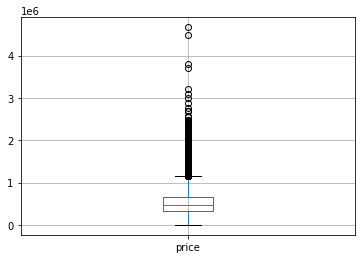

In [ ]:
dataset.boxplot(column=['price'])

In [ ]:
dataset.insert(0, "new", 1, allow_duplicates=False)
dataset = dataset.sample(frac=1).reset_index(drop=True)

### 1.c Separación del dataset (0.2 ptos)
Necesitamos saber qué tan confiables son los modelos. Por esto, saca una pequeña muestra de tu dataset y déjala aparte. Es importante que no entrenes las regresiones con ellos. (Saca el 10% de los datos)

In [ ]:
# Completa aqui
train_dataset = dataset.sample(frac = 0.9)
test_dataset = dataset.drop(train_dataset.index)

### 1.d Transformación del dataset (0.5 ptos)

Ahora que ya tienes tu dataset trabajado y separado, necesitamos transformarlo a parámetros utilizables por la regresión a implementar. En la parte 3 se trabajará un poco más, pero por ahora, sólo separa el dataset en una matriz $X$ conteniendo todas las características, y un vector $y$ conteniendo la variable dependiente asociada a cada una de las filas de características.
Es decir, $y$ es un vector de lo que queremos predecir, y $X$ es una matriz de lo que usaremos para hacerlo.
Recomendamos **FUERTEMENTE** utilizar numpy para esto ya que tiene funciones muy útiles para manejo de matrices y vectores, pero no es obligación.

In [ ]:
# Obten los vectores X e y a partir de train_dataset
X_train = train_dataset.loc[:, train_dataset.columns != 'price'].to_numpy()
y_train = train_dataset['price'].to_numpy()
X_tested = test_dataset.loc[:, test_dataset.columns != 'price'].to_numpy()
y_tested = test_dataset['price'].to_numpy()
print(len(X_train), len(X_tested))

4137 460


## Parte 2: Regresión Lineal (2 ptos.)
En esta parte, deberás hacer una implementación de una regresión lineal con el método "Least squares" (visto en clases). Para esto deberás completar la clase `LinearRegression`, en especifico sus métodos fit y predict.


### Forma A: sistema de ecuaciones

Una regresión lineal se define de la siguiente manera:

$$\hat{y}-b_{0}=b_{1}\left(x_{1}-\bar{x}_{1}\right)+b_{2}\left(x_{2}-\bar{x}_{2}\right)+\cdots+b_{k}\left(x_{k}-\bar{x}_{k}\right)$$

Es decir:

$$
\hat{y}-b_{0}=\sum_{j=1}^{k} b_{j}\left(x_{j}-\bar{x}_{j}\right)
$$

$\bf{Teorema}$: la mejor línea de regresión tiene forma:

$$ \hat{y} - \overline{y} = \sum_{j=1}^kb_j(x_j-\overline{x_j})$$

Donde $b_m$ son las soluciones a las siguientes $k$ ecuaciones con $k$ valores desconocidos.
$$
\forall j\in\{1,k\} \quad \operatorname{cov}\left(y, x_{j}\right)=\sum_{m=1}^{k} b_{m} \cdot \operatorname{cov}\left(x_{m}, x_{j}\right)
$$

### Forma B: operaciones matriciales

Podemos definir una regresión lineal múltiple como:

$$
\mathrm{y}=\mathrm{X} \boldsymbol{\beta}
$$

Donde:

$$
\mathbf{X}=\left[\begin{array}{cccc}
X_{10} & X_{11} & \cdots & X_{1 (p-1)} \\
X_{20} & X_{21} & \cdots & X_{2 (p-1)} \\
\vdots & \vdots & \ddots & \vdots \\
X_{n 0} & X_{n 1} & \cdots & X_{n (p-1)}
\end{array}\right], \quad \boldsymbol{\beta}=\left[\begin{array}{c}
\beta_{0} \\
\beta_{1} \\
\vdots \\
\beta_{p-1}
\end{array}\right], \quad \mathbf{y}=\left[\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{n}
\end{array}\right]
$$

(Notemos que para acomodarnos a esta definición, incluimos el alpha/$\beta_0$ o intercepto dentro de nuestro vector $\beta$, para que esto funcione, debemos agregarle una columna de 1s a la matrix $X$. En este caso, corresponden a todos los $X_{n0}$ )

$\bf{Teorema}$: podemos entonces encontrar los coeficientes $\beta$ de la siguiente forma:

$$
\hat{\boldsymbol{\beta}}=\left(\mathrm{X}^{\top} \mathrm{X}\right)^{-1} \mathrm{X}^{\top} \mathbf{y}
$$


Una vez ajustados estos coeficientes, tu método predict debe utilizarlos para calcular el valor de $y$ a partir de un vector de características $x$.

In [ ]:
class LinearRegression:
  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.alpha = np.zeros(1)              # Completar esto 
    self.betas = np.zeros(len(X[0]))      # Completar esto

  def fit(self):
    X_t = np.transpose(self.X)
    inverse = np.dot(X_t, self.X)
    w = np.linalg.inv( inverse)
    b = np.dot(X_t, self.y)
    self.betas = np.dot(w, b)
    pass

  def predict(self, x):
    return np.dot(x, self.betas)

Hecho esto, prueba tu Regresión Lineal entrenándola con la matriz $X$ y el vector $y$ de entrenamiento que obtuviste anteriormente.

In [ ]:
lineal = LinearRegression(X_train, y_train)
lineal.fit()

Prueba predecir el valor del precio de algunas (al menos 5) filas de tu matriz $X$ de prueba (separada en 1.c). ¿Que tanto se parece al precio real? ¿A que se puede deber este resultado?

In [ ]:
y_probando = lineal.predict(X_tested[:300])
nice = []
sum = 0
for i in range(300):
  sum += (2*(abs(y_tested[i]-y_probando[i])/(abs(y_tested[i])+abs(y_probando[i]))*1000)//1)/10
print("error", f"{sum/300}%")

error 30.830333333333336%


Notamos que el error promedio relativo, es de un 30.83%, esto se puede deber a que la regresion lineal a pesar de tener varios coeficientes que ajustan sus betas, de igual manera no es tan buena prediciendo relaciones mas complejas, como puede ser esta que involucra 12 factores distinto.

## Parte 3: Regresión Logística (2.5 ptos.)
En esta parte, deberás hacer una implementación de una regresión logística que entrene sus coeficientes empleando descenso de gradiente. Antes que nada, y como se vio en clases, utilizamos regresiones logísticas para clasificar si un dato pertenece o no a una clase.

Primero debes modificar el vector $y$ para que represente una clase binaria. En este caso definiremos que una case pertenece a:


*   Clase 1 si es que su precio es mayor o igual a USD $1.000.000
*   Clase 0 en cualquier otro caso.

Este será el nuevo vector a predecir.

In [ ]:
# Modifica el vector y según lo anterior. Recuerda modificar ambos vectores: el vector de entrenamiento y el de testeo.
def vectors(wenlo):
   if wenlo >= 1_000_000:
     return 1
   else:
     return 0
    
train_dataset['price'] = train_dataset['price'].apply(vectors)
test_dataset['price'] = test_dataset['price'].apply(vectors)

In [ ]:
y_train = train_dataset['price'].to_numpy()
y_tested = test_dataset['price'].to_numpy()

/En el codigo de abajo hay una clase llamada `LogisticRegression` cuyo constructor recibe como parámetro el número de _features_ que espera recibir. Tienes que completar esta clase para que pueda entrenar y predecir. Lo que necesitas es:
- Programar el método `train`, que vendría a ser equivalente al método `fit` de Scikit Learn. Tienes que utilizar el algoritmo _Gradient Descent_ visto en clases.
- Programar el método `predict` que asume que tu modelo ya está entrenado.

Para hacer esto puedes hacer los supuestos razonables que estimes conveniente. Además, si te acomoda trabajar sin clases puedes hacerlo, mientras uses el algoritmo de _Gradient Descent_.
Recuerda además que el gradiente de la función objetivo para cada $\beta_i$ es:

$$ \frac{\delta}{\delta \beta_i}L(\beta) = \frac{lr}{m} \sum_{1 \leq j \leq m} (\sigma(\beta^T x^j) - y_j) x_i^j $$

Donde $L(\beta)$ es la función de verosimilitud, $\beta$ es el vector de coeficientes para la regresión, tenemos $m$ filas en nuestro _dataset_, $\sigma(x)$ es la función $\frac{1}{1 + e^{-x}}$, $x^j$ es la fila $j$ de nuestro dataset (y asociado tiene su respuesta $y_j$) y finalmente $x_i^j$ es la columna $i$ de la fila $j$ en nuestro _dataset_.

In [ ]:
import numpy as np #Si lo importaste antes, esta linea no es necesaria.

def sigmoid(x):    
    output = 1 / (1 + np.exp(-x))
    return output

class LogisticRegression:
    def __init__(self, number_of_features, learning_rate=0.00000001, number_of_iterations=100):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
        self.beta = np.zeros(number_of_features) # Completar aquí
        
    def train(self, X, y):

        self.m, self.n = X.shape
        self.X = X
        self.y = y
        for step in range(self.number_of_iterations):
           
          for i in range(self.n):
            sum = 0

            for j in range(self.m):
              sigmoide = np.dot(np.transpose(self.beta), self.X[j])
              w = sigmoid(sigmoide)- self.y[j]
              sum += w*self.X[j][i]

            self.beta[i] =self.beta[i] - ((self.learning_rate*sum)/self.m)



    def predict(self, x):
      y = np.zeros(len(x))
      y_predict = []
      for i in range(len(x)):
        y = sigmoid(np.dot(np.transpose(self.beta),x[i]))
        if y >= 0.5:
          y_predict.append(1)
        else:
          y_predict.append(0)
      return y_predict


Hecho esto, prueba tu regresión logística entrenándola con la matriz $X$ y el nuevo vector binario $y$ de entrenamiento que obtuviste anteriormente.

In [ ]:
logistic = LogisticRegression(len(X_train[0]))
logistic.train(X_train, y_train)

Prueba predecir la categoría del precio de algunas (al menos 5) filas de tu matriz $X$ de prueba (separada en 1.c). ¿Es correcta la predicción? ¿A que se puede deber este resultado?

In [ ]:
y_predicted = logistic.predict(X_tested)
deberian = 0
fueron = 0
for i in range(len(X_tested)):
  if y_tested[i]:
    deberian +=1
    if y_tested[i] == y_predicted[i]:
      fueron +=1
  print(f"{i+1})","se supone:",y_tested[i], "vs"," predijido:", y_predicted[i])

print(deberian, fueron)

1) se supone: 0 vs  predijido: 0
2) se supone: 0 vs  predijido: 0
3) se supone: 0 vs  predijido: 0
4) se supone: 0 vs  predijido: 0
5) se supone: 0 vs  predijido: 0
6) se supone: 0 vs  predijido: 0
7) se supone: 0 vs  predijido: 0
8) se supone: 0 vs  predijido: 0
9) se supone: 1 vs  predijido: 0
10) se supone: 0 vs  predijido: 0
11) se supone: 0 vs  predijido: 0
12) se supone: 0 vs  predijido: 0
13) se supone: 0 vs  predijido: 0
14) se supone: 0 vs  predijido: 0
15) se supone: 0 vs  predijido: 0
16) se supone: 0 vs  predijido: 0
17) se supone: 0 vs  predijido: 0
18) se supone: 0 vs  predijido: 0
19) se supone: 0 vs  predijido: 0
20) se supone: 0 vs  predijido: 0
21) se supone: 0 vs  predijido: 0
22) se supone: 0 vs  predijido: 0
23) se supone: 1 vs  predijido: 0
24) se supone: 0 vs  predijido: 0
25) se supone: 0 vs  predijido: 0
26) se supone: 0 vs  predijido: 0
27) se supone: 0 vs  predijido: 0
28) se supone: 0 vs  predijido: 0
29) se supone: 0 vs  predijido: 0
30) se supone: 0 vs  pr

Los datos predecidos, son totalmente incorrectos, de hecho en 30 posibles casos que se deberia predecir la cateogira 1, se hizo 0. Esto se puede deber primero a que como es una regresion logistica, depende tambien de las probabilidades que los betas, como vemos que tenemos pocos casos de price = 1, esto genera problemas en calcular los betas. Otro problema que se genera, es que las variables independientes con las dependientes se relacional linealmente, pero esto genera un problema.

## Parte 4 (BONUS): Meme (1-2 décimas)

Haga un meme. Si es bueno, décimas extra. SÓLO MEMES RELACIONADOS AL CURSO PORFAVOR.

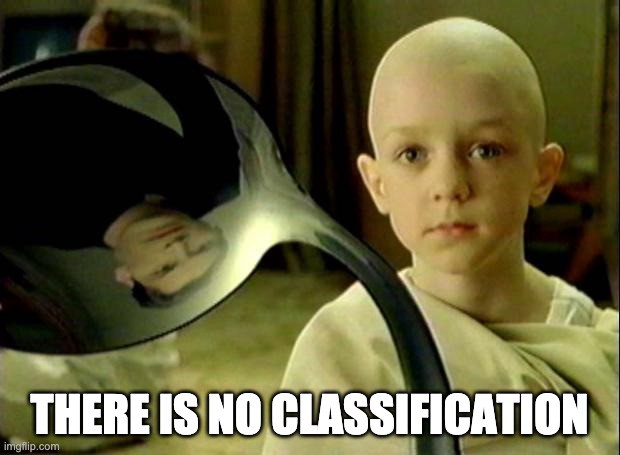